In [2]:
import numpy as np
import pandas as pd
import time

start_time = time.time()
df = pd.read_csv('./dataset/UserBehavior.csv', nrows=1000000)
df.columns = ['UserID','ItemID','CategoryID','BehaviorType','TimeStamp']
print(df.columns)
print(df)
end_time = time.time()
print("Read and preprocess data finished! Time cost: %.2f s" % (end_time - start_time))


Index(['UserID', 'ItemID', 'CategoryID', 'BehaviorType', 'TimeStamp'], dtype='object')
        UserID   ItemID  CategoryID BehaviorType   TimeStamp
0            1  2333346     2520771           pv  1511561733
1            1  2576651      149192           pv  1511572885
2            1  3830808     4181361           pv  1511593493
3            1  4365585     2520377           pv  1511596146
4            1  4606018     2735466           pv  1511616481
...        ...      ...         ...          ...         ...
999995  128600  4935668     2640118         cart  1511826588
999996  128600  3175221     2640118         cart  1511826676
999997  128600  3840425     2640118           pv  1511826695
999998  128600  2495970     2640118         cart  1511826739
999999  128600  1413345     2640118           pv  1511826789

[1000000 rows x 5 columns]
Read and preprocess data finished! Time cost: 0.62 s


In [3]:
print(sum(df['BehaviorType'] == 'pv'))
import matplotlib.pyplot as plt
types = ['pv', 'buy', 'cart', 'fav']
nums = []
for t in types:
    nums.append(sum(df['BehaviorType'] == t))
print(nums)
print(sum(nums) == len(df))
# plt.bar()

896106
[896106, 20359, 55447, 28088]
True


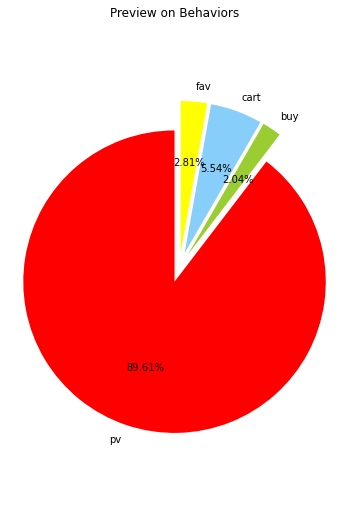

In [4]:
plt.figure(figsize=(6,9)) #调节图形大小
labels = types #定义标签
sizes =nums #每块值
colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
explode = (0.1,0.1,0.1,0.1) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.title("Preview on Behaviors")
plt.axis('equal')
plt.show()

In [5]:
# processed_df = df.replace({'pv':0, 'buy':1, 'cart':2, 'fav':3})
# print(processed_df)
from collections import Counter
print(Counter(df['BehaviorType']))

Counter({'pv': 896106, 'cart': 55447, 'fav': 28088, 'buy': 20359})


In [6]:
df['BehaviorType'] = df['BehaviorType'].map({'pv':0,'cart':1,'fav':2,'buy':3})
print(Counter(df['BehaviorType']))

Counter({0: 896106, 1: 55447, 2: 28088, 3: 20359})


In [7]:
df['BehaviorType']=df['BehaviorType'].apply(lambda x: list(str(x)))
print(df['BehaviorType'].loc[0])
df['TimeStamp']=df['TimeStamp'].apply(lambda x: list(str(x).split('.0')))
print(df['TimeStamp'].loc[0])

['0']
['1511561733']


In [24]:
a = df.groupby('UserID')['BehaviorType'].sum()
b = df.groupby('UserID')['TimeStamp'].sum()
c = df.groupby(['UserID', 'CategoryID'])['BehaviorType'].sum()
print(c)
print(b)
data = pd.DataFrame()
data['time_list'] = b
data['Behavior_list'] = a
print(data.head(10))


# data['is_pv'] = data['Behavior_list'].apply(lambda x: Counter(x)['1'])
# print(data['is_pv'].loc[1])



UserID   CategoryID
1        149192                                       [0, 0, 0, 0, 0, 0]
         411153                                       [0, 0, 0, 0, 0, 0]
         982926                                                      [0]
         1080785                                                     [0]
         1320293                                                  [0, 0]
                                             ...                        
1018011  2322253                                                     [0]
         2885642       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
         3669044                                                  [3, 0]
         4284875                                                     [0]
         4719814                                            [0, 0, 0, 0]
Name: BehaviorType, Length: 239630, dtype: object
UserID
1          [1511561733, 1511572885, 1511593493, 151159614...
100        [1511550516, 1511550600, 1511550806, 151155088..

In [19]:
# print(data['Behavior_list'])
length = 0
limit = 10
count = 0
data_set = []
for d in data['Behavior_list']:
    if len(d) < limit:
#         print(len(d), length)
        count += 1
    else:
        data_set.append(d)
# print(data_set[:5])
print(len(data['Behavior_list']), count)
#     break

[['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '2', '0', '2', '0', '3', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '0', '0', '3', '3', '0', '3', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '2', '2', '0', '0', '2', '0', '0',

In [21]:
labels = []
input_data = []
for inputs in data_set:
    print(max(inputs[9:]))
    input_data = (inputs[:9])
    labels.append(inputs[9:])

0
3
2
3
0
3
3
3
2
0
3
2
3
0
0
1
3
1
2
3
3
3
2
3
3
3
3
0
3
3
3
3
3
3
3
3
3
1
2
3
3
1
3
3
3
1
3
1
3
3
3
0
3
3
3
2
0
3
3
3
0
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
0
3
3
2
2
2
3
2
3
3
3
3
3
1
2
3
3
0
3
2
1
3
0
2
3
3
2
3
3
3
3
3
3
3
3
3
3
2
1
3
3
3
3
3
3
3
0
2
3
3
3
1
2
3
1
3
3
3
1
3
2
3
3
3
2
3
2
1
3
3
2
3
3
3
3
3
1
3
3
1
3
3
0
3
3
0
3
3
3
0
3
3
3
3
0
3
1
3
2
2
3
1
2
3
3
3
3
3
1
3
2
3
3
3
1
3
3
3
3
2
3
3
3
3
0
1
3
2
3
0
3
3
1
3
0
0
3
3
3
3
1
0
3
3
1
3
3
1
2
3
1
3
2
3
3
3
1
3
1
3
2
3
3
2
3
2
3
1
2
3
0
3
1
3
0
2
0
1
3
3
3
3
3
1
3
0
3
3
1
1
3
3
2
0
2
3
1
1
3
3
3
1
1
1
3
1
0
3
3
3
3
3
1
3
1
3
0
1
3
3
2
3
3
3
1
2
3
3
3
0
3
2
3
3
1
0
3
3
3
3
3
3
1
3
3
3
3
3
1
1
3
3
3
3
2
0
3
3
3
3
3
0
3
3
3
3
1
3
3
3
3
1
2
1
3
0
1
3
3
3
2
3
3
3
3
3
1
3
2
3
3
3
1
3
1
3
3
3
2
3
3
3
2
3
3
0
1
0
1
3
3
0
3
1
2
3
3
3
3
3
1
3
0
2
3
3
3
3
3
3
1
2
1
3
1
3
2
3
3
3
1
3
2
3
0
3
1
1
2
2
3
3
1
3
2
2
1
3
3
2
0
3
3
3
3
2
3
1
3
3
3
1
1
3
1
3
3
3
1
2
0
3
3
0
3
3
2
3
3
3
1
3
3
2
3
3
3
3
3
3
0
3
3
3
0
3
3
3
3
3
1
3
2
3
3
3
3
3
1
0
3


3
3
0
2
1
1
3
3
1
3
0
3
3
1
3
3
0
3
3
3
3
3
3
3
3
1
3
2
1
3
2
2
3
2
2
3
3
3
3
3
3
3
3
3
1
3
2
3
2
3
1
2
3
2
3
3
3
1
3
1
3
1
3
2
0
3
0
3
3
0
1
3
1
1
3
3
2
3
3
0
1
0
3
3
3
3
2
3
3
3
3
2
3
3
1
3
0
2
2
0
3
1
3
3
3
1
0
3
3
2
3
1
1
3
2
3
1
3
3
3
3
3
2
1
3
1
3
2
3
1
2
3
3
3
3
2
3
3
3
3
3
1
3
3
3
2
3
1
3
3
3
1
3
2
3
3
2
2
3
3
3
0
3
3
1
3
3
1
2
3
2
2
3
3
3
1
0
1
3
3
3
0
3
0
3
3
1
3
2
3
3
3
3
3
3
2
2
3
3
0
3
0
3
3
3
3
1
0
3
3
3
3
2
3
3
3
3
0
2
3
1
3
2
3
1
1
3
3
3
3
3
3
3
3
3
0
1
3
3
2
3
0
3
0
0
2
3
3
1
1
2
3
3
3
0
2
3
3
3
3
3
2
1
3
3
3
2
2
1
2
3
3
3
3
0
0
3
0
3
2
3
1
3
3
3
2
2
3
3
3
1
1
3
3
3
3
2
3
3
3
2
3
3
2
3
3
3
3
2
3
3
3
3
3
0
1
1
3
3
3
2
0
3
3
3
3
3
3
3
1
3
3
3
3
3
3
1
3
3
0
1
3
3
3
3
3
3
3
1
1
3
3
3
2
3
1
1
3
3
3
2
3
3
3
1
3
3
3
2
2
2
3
1
1
3
3
3
1
1
2
3
3
3
1
3
2
2
3
3
3
3
3
0
3
1
2
3
1
3
3
3
3
3
2
1
3
1
3
2
2
1
0
3
3
3
3
3
3
1
3
3
3
3
3
3
3
2
1
3
3
2
2
3
1
3
3
3
1
1
3
1
3
3
2
0
3
3
3
1
3
3
0
1
3
3
2
3
3
1
2
0
1
1
3
1
0
0
3
2
2
3
3
3
1
3
0
0
1
3
3
3
2
3
2
1
3
1
3
0
0
3
2
3
2
3
1
0
1
3
3


3
3
1
3
2
1
3
1
3
3
3
3
0
3
1
1
3
3
3
2
3
2
1
3
3
3
3
3
2
3
3
3
3
1
3
3
3
1
3
2
2
3
1
3
3
3
3
3
3
3
1
3
3
1
2
3
1
3
3
3
2
3
3
3
3
3
3
3
3
1
2
3
3
3
3
3
0
3
3
1
3
3
3
3
3
3
3
0
3
3
3
1
2
2
3
1
3
3
3
3
3
3
3
3
3
3
3
0
0
2
3
0
1
3
3
2
0
3
3
3
2
1
3
1
0
3
1
2
3
2
3
3
3
3
3
2
3
3
2
3
3
3
3
1
3
3
1
0
1
3
1
3
3
3
3
3
3
3
3
3
1
3
2
3
2
3
3
3
0
3
3
3
3
3
1
3
3
1
0
1
3
1
3
3
3
3
3
1
3
1
3
3
2
3
3
3
1
3
3
2
2
3
2
2
3
2
3
3
3
2
1
2
1
3
1
3
3
3
3
3
2
0
2
2
3
3
3
3
1
3
2
3
0
3
0
3
2
3
3
3
1
3
1
3
3
3
2
2
3
3
3
3
3
3
2
1
1
2
3
1
0


In [ ]:
# develop data_set with different length of timestamp
